# Initial EDA: Uber April-August 2014 Data

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import folium

In [7]:
os.chdir("/Users/hildeyounce/MSDS/NYC-Project/NYC-transportation/uber/datasets") # change this in final
os.getcwd()

'/Users/hildeyounce/MSDS/NYC-Project/NYC-transportation/uber/datasets'

### Uber trip files
The csv files for April-August contain the following columns:
- **Date/Time:** The date and time of the Uber pickup
- **Lat:** The latitude of the Uber pickup
- **Lon:** The longitude of the Uber pickup
- **Base:** The TLC (Taxi & Limousine Commission) base company code affiliated with the Uber pickup. 

In [8]:
uber_apr14 = pd.read_csv("uber-raw-data-apr14.csv")
uber_apr14.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 564516 entries, 0 to 564515
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Date/Time  564516 non-null  object 
 1   Lat        564516 non-null  float64
 2   Lon        564516 non-null  float64
 3   Base       564516 non-null  object 
dtypes: float64(2), object(2)
memory usage: 17.2+ MB


In [9]:
uber_apr14

,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512
...,...,...,...,...
564511,4/30/2014 23:22:00,40.7640,-73.9744,B02764
564512,4/30/2014 23:26:00,40.7629,-73.9672,B02764
564513,4/30/2014 23:31:00,40.7443,-73.9889,B02764
564514,4/30/2014 23:32:00,40.6756,-73.9405,B02764


In [10]:
uber_may14 = pd.read_csv("uber-raw-data-may14.csv")
uber_jun14 = pd.read_csv("uber-raw-data-jun14.csv")
uber_jul14 = pd.read_csv("uber-raw-data-jul14.csv")
uber_aug14 = pd.read_csv("uber-raw-data-aug14.csv")

### Base Codes for TLC Base companies:

In [11]:
replace_map = {
    'B02512' : 'Unter',
    'B02598' : 'Hinter',
    'B02617' : 'Weiter',
    'B02682' : 'Schmecken',
    'B02764' : 'Danach-NY',
    'B02765' : 'Grun',
    'B02835' : 'Dreist',
    'B02836' : 'Drinnen'
}
uber_apr14['Base'] = uber_apr14['Base'].replace(replace_map)
uber_may14['Base'] = uber_may14['Base'].replace(replace_map)
uber_jun14['Base'] = uber_jun14['Base'].replace(replace_map)
uber_jul14['Base'] = uber_jul14['Base'].replace(replace_map)
uber_aug14['Base'] = uber_aug14['Base'].replace(replace_map)

In [12]:
uber_apr14

,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,Unter
1,4/1/2014 0:17:00,40.7267,-74.0345,Unter
2,4/1/2014 0:21:00,40.7316,-73.9873,Unter
3,4/1/2014 0:28:00,40.7588,-73.9776,Unter
4,4/1/2014 0:33:00,40.7594,-73.9722,Unter
...,...,...,...,...
564511,4/30/2014 23:22:00,40.7640,-73.9744,Danach-NY
564512,4/30/2014 23:26:00,40.7629,-73.9672,Danach-NY
564513,4/30/2014 23:31:00,40.7443,-73.9889,Danach-NY
564514,4/30/2014 23:32:00,40.6756,-73.9405,Danach-NY


### NYC Neighborhood from Lat/Lon

Plan: hit google maps geocode API to convert coordinates into zipcodes, then map zipcodes to neighborhoods

In [13]:
min_lat = min(uber_apr14['Lat'])
max_lat = max(uber_apr14['Lat'])
print(min_lat, max_lat)

40.0729 42.1166


In [14]:
min_lon = min(uber_apr14['Lon'])
max_lon = max(uber_apr14['Lon'])
print(min_lon, max_lon)

-74.7733 -72.0666


**Map 100 Lat/Lon points onto map of NYC:**

In [15]:
nyc_map100 = folium.Map(location=[40.7128, -74.0060], zoom_start=12)
nyc_map100

In [16]:
for i in range(0,100):
    folium.Marker([uber_apr14['Lat'][i], uber_apr14['Lon'][i] ]).add_to(nyc_map100)

In [18]:
nyc_map100.save('nyc_map100.html')
nyc_map100

### EDA on April Uber Data

<BarContainer object of 5 artists>

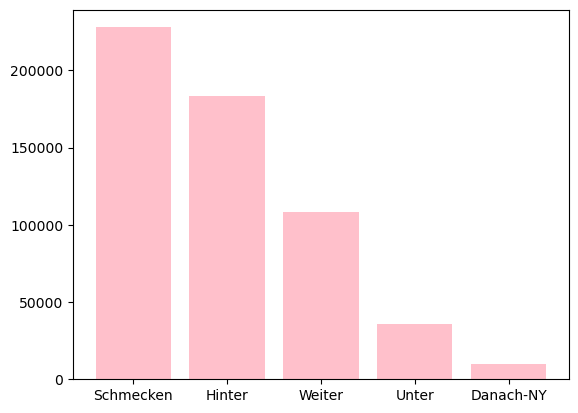

In [44]:
base_df = uber_apr14['Base'].value_counts().to_frame().reset_index()
plt.bar(base_df['Base'], base_df['count'], color = "pink")

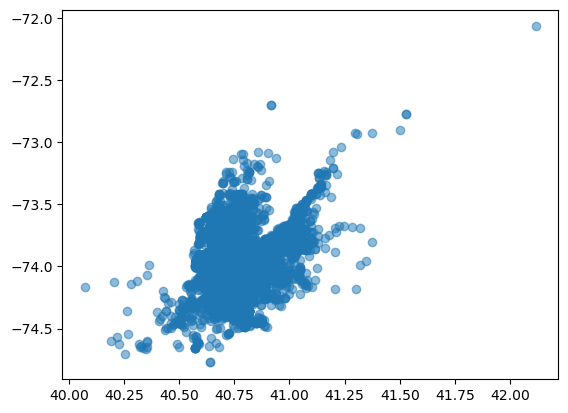

In [45]:
plt.scatter(uber_apr14['Lat'], uber_apr14['Lon'], alpha = 0.5)